# Pandas bilan Grafik Chizish
`plot()` metodi `Series` va `DataFrame` obyektlarida mavjud. Ko'plab parametrlar `matplotlib` ga o'tkaziladi. `kind` argumenti grafik turini o'zgartirish imkonini beradi. Quyida ba'zi keng tarqalgan parametrlar keltirilgan:

| Parametr | Maqsad | Ma'lumot turi |
| --- | --- | --- |
| `kind` | Grafik turini belgilaydi | String |
| `x`/`y` | *x*-o'qida/*y*-o'qida chiziladigan ustun(lar) | String yoki ro'yxat |
| `ax` | Grafikni berilgan `Axes` obyektiga chizadi | `Axes` |
| `subplots` | Subplotlarni yaratish yoki yo'qligini belgilaydi | Boolean |
| `layout` | Subplotlarni qanday joylashtirishni belgilaydi | `(satrlar, ustunlar)` tuplami |
| `figsize` | `Figure` obyektining o'lchamini belgilaydi | `(eni, bo'yi)` tuplami |
| `title` | Grafik yoki subplotlarning sarlavhasi | Grafik sarlavhasi uchun satr yoki subplot sarlavhalari uchun satrlar ro'yxati |
| `legend` | Legenda ko'rsatilishini belgilaydi | Boolean |
| `label` | Legendada obyektni qanday nomlashni belgilaydi | Agar bitta ustun chizilayotgan bo'lsa, satr; aks holda, satrlar ro'yxati |
| `style` | Har bir obyekt uchun `matplotlib` uslubi satrlari | Agar bitta ustun chizilayotgan bo'lsa, satr; aks holda, satrlar ro'yxati |
| `color` | Obyektni chizish uchun rang | Agar bitta ustun chizilayotgan bo'lsa, satr yoki qizil, yashil, ko'k tuple; aks holda, ro'yxat |
| `colormap` | Foydalaniladigan ranglar xaritasi | String yoki `matplotlib` ranglar xaritasi obyekti |
| `logx`/`logy`/`loglog` | *x*-o'qida, *y*-o'qida yoki ikkala o'qda logarifmik miqyosdan foydalanish yoki yo'qligini belgilaydi | Boolean |
| `xticks`/`yticks` | *x*-o'qida/*y*-o'qida qaysi joylarda belgi qo'yishni belgilaydi | Qiymatlar ro'yxati |
| `xlim`/`ylim` | *x*-o'qida/*y*-o'qida o'q chegaralari | `(min, max)` shaklidagi tuplam |
| `rot` | Belgilarni qanday burchakda yozishni belgilaydi | Butun son |
| `sharex`/`sharey` | Subplotlar *x*-o'qida/*y*-o'qida bo'lishishini belgilaydi | Boolean |
| `fontsize` | Belgilar hajmini boshqaradi | Butun son |
| `grid` | Tarmoq chiziqlarini yoqadi/o'chiradi | Boolean |

## Ma'lumotlar Haqida
Ushbu daftar ichida biz quyidagi 3 ta dataset bilan ishlaymiz:
- Facebook kompaniyasining 2018 yil davomida aksiyalar narxi ([`stock_analysis` paketi](https://github.com/stefmolin/stock-analysis) yordamida olingan)
- 2018 yil 18-sentabrdan 13-oktabrgacha bo'lgan zilzila ma'lumotlari (AQSh Geologik Tadqiqot (USGS) tashkilotidan [USGS API](https://earthquake.usgs.gov/fdsnws/event/1/) orqali olingan)
- Yevropa Kasalliklarni Oldini Olish va Boshqarish Markazining (ECDC) [COVID-19 yangi holatlari bo'yicha har kuni mamlakatlar bo'yicha hisobotlar](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide) dataseti, 2020 yil 19-sentabrda to'plangan, [bu havola orqali](https://opendata.ecdc.europa.eu/covid19/casedistribution/csv)

## Sozlash


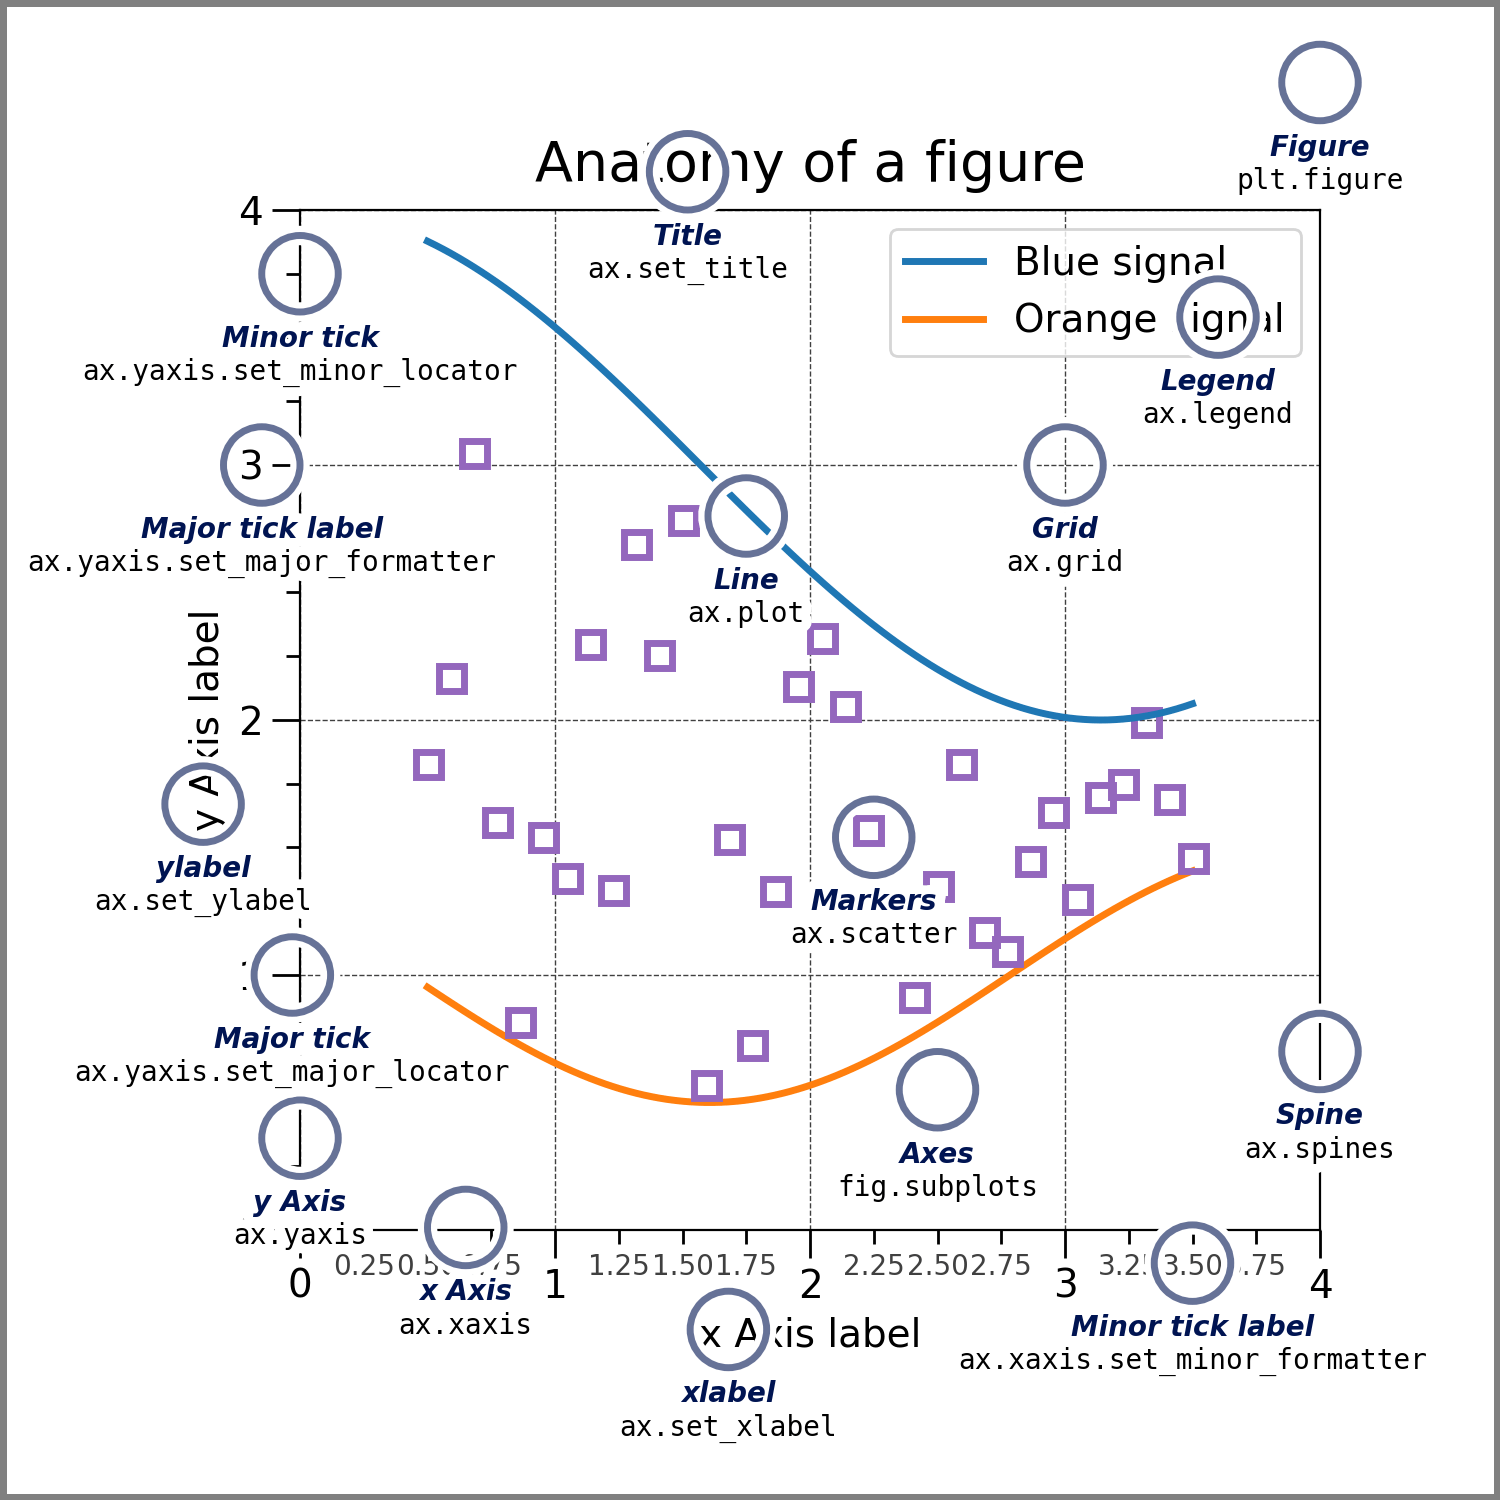

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('data/earthquakes.csv')
covid = pd.read_csv('data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

## Vaqt o'tishi bilan o'zgarish
Chiziqli grafiklar bizga o'zgaruvchi vaqt davomida qanday o'zgarishini ko'rsatishda yordam beradi. Ular `kind` argumentining standart qiymati hisoblanadi, ammo niyatimizni aniq ko'rsatish uchun `kind='line'` deb yozishimiz mumkin:


<Axes: title={'center': 'Evolution of Facebook Open Price'}, xlabel='date'>

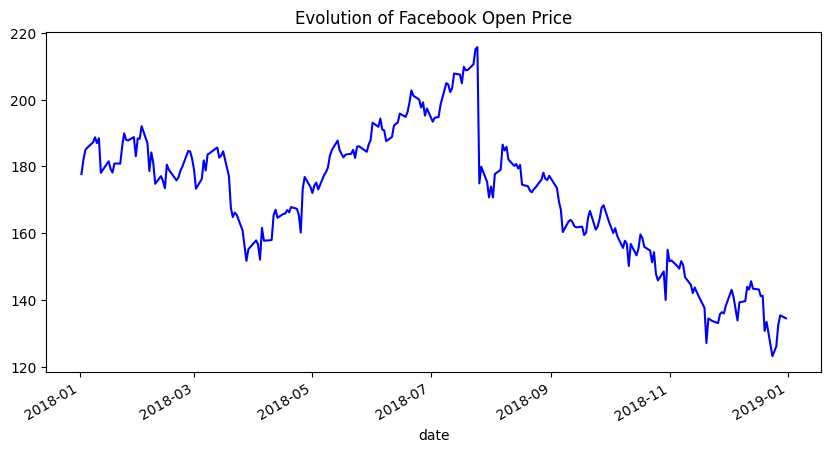

In [2]:
fb.plot(
    kind='line',
    y='open',
    figsize=(10, 5),
    style='-b',
    legend=False,
    title='Evolution of Facebook Open Price'
)

Oldingi misolda `style` argumentini taqdim etdik; ammo xuddi shu natijani olish uchun `color` va `linestyle` argumentlarini ishlatishimiz mumkin:


<Axes: title={'center': 'Evolution of Facebook Open Price'}, xlabel='date'>

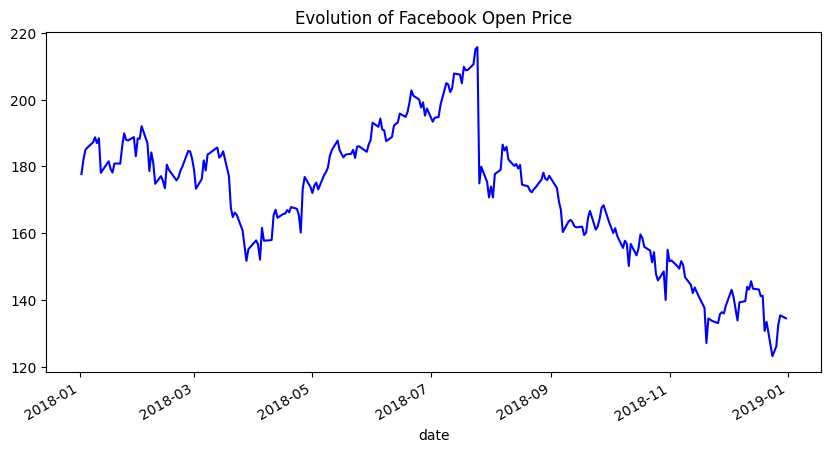

In [3]:
fb.plot(
    kind='line',
    y='open',
    figsize=(10, 5),
    color='blue',
    linestyle='solid',
    legend=False,
    title='Evolution of Facebook Open Price'
)

In [10]:
fb.first('1W')

<ipython-input-10-db06dd381446>:1: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  fb.first('1W')


,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535


Shuningdek, bir vaqtning o'zida ko'plab chiziqlarni chizishimiz mumkin, buning uchun faqatgina chiziladigan ustunlar ro'yxatini uzatish kifoya:


<ipython-input-13-645cba0274a5>:1: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  fb.first('1W').plot(


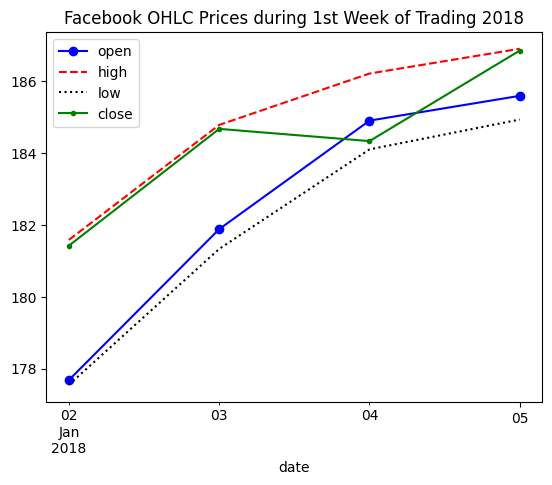

In [13]:
fb.first('1W').plot(
    y=['open', 'high', 'low', 'close'],
    style=['o-b', '--r', ':k', '.-g'],
    title='Facebook OHLC Prices during 1st Week of Trading 2018'
).autoscale()

### Subplotlar Yaratish
`pandas` bilan grafik chizishda subplotlarni yaratish juda oddiy — faqat `plot()` metodiga `subplots=True` ni uzatish va (ixtiyoriy ravishda) `layout` ni `(satrlar, ustunlar)` tuplami sifatida belgilash kerak:


array([[<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>]], dtype=object)

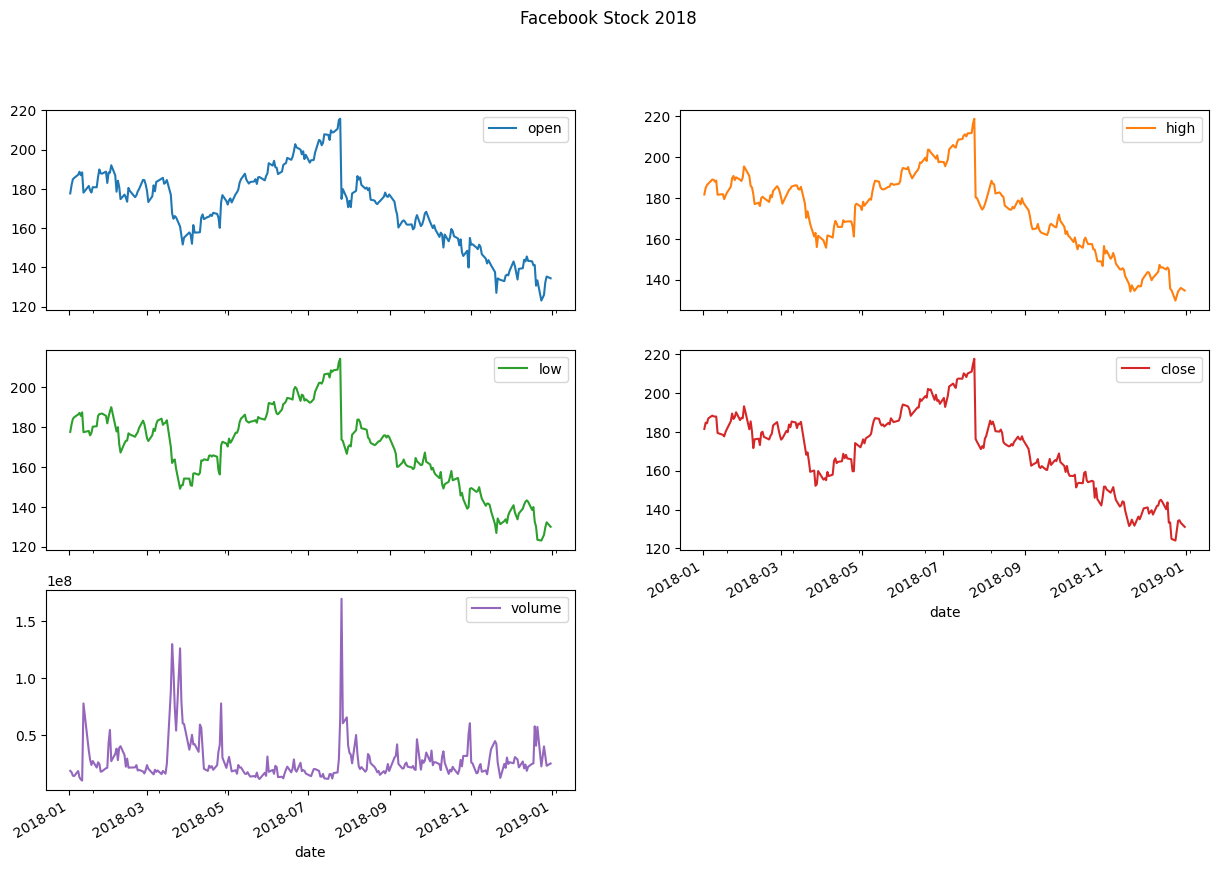

In [14]:
fb.plot(
    kind='line',
    subplots=True,
    layout=(3, 2),
    figsize=(15, 10),
    title='Facebook Stock 2018'
)

E'tibor bering, biz aniq bir ustunni chizishni ko'rsatmadik va `pandas` barchasini biz uchun chizdi.

Ba'zan har birida bir nechta o'zgaruvchilar bo'lgan subplotlarni yaratishni istaymiz, bu esa `ax` parametridan foydalanish orqali amalga oshiriladi. Buni tushuntirish uchun, keling, Xitoy, Ispaniya, Italiya, AQSh, Braziliya va Hindistondagi kunlik yangi COVID-19 kasalliklar soniga qaraylik:


In [15]:
new_cases_rolling_average = covid.pivot_table(
    index=covid.index,
    columns='countriesAndTerritories',
    values='cases'
).rolling(7).mean()

Bu qiymatlarda juda katta o'zgarishlar bo'lgani uchun, biz yangi kasalliklar sonining 7 kunlik o'rtacha harakatini `rolling()` metodidan foydalangan holda chizamiz. Har bir mamlakat uchun alohida grafik yaratishdan (bu taqqoslashni qiyinlashtiradi) yoki barchasini birga chizishdan (bu kichik qiymatlarni ko'rishni qiyinlashtiradi) ko'ra, biz o'xshash kasallik soniga ega bo'lgan mamlakatlarni bir xil subplotda chizamiz:


<Axes: xlabel='date'>

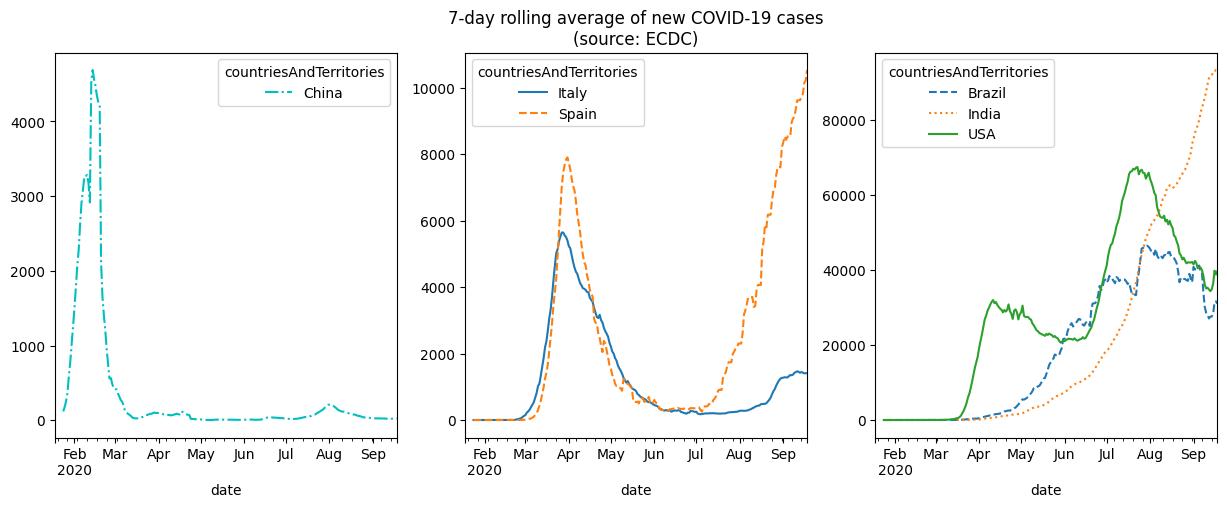

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

new_cases_rolling_average[['China']].plot(ax=axes[0], style='-.c')
new_cases_rolling_average[['Italy', 'Spain']].plot(
    ax=axes[1], style=['-', '--'],
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)
new_cases_rolling_average[['Brazil', 'India', 'USA']].plot(ax=axes[2], style=['--', ':', '-'])

*ESLATMA: biz chiziqlarni farqlash uchun chiziq uslublarini shu yerda ko'rsatdik, shunda chiziqlar matnda qora va oq tasvir sifatida ajralib turadi.*

Oldingi grafikda biz yangi COVID-19 kasalliklari darajasi o'xshash bo'lgan mamlakatlarni taqqoslash imkoniga ega bo'ldik, ammo barchasini bir xil grafikda taqqoslash imkoniyati bo'lmadi, chunki o'lchamlar farq qiladi. Buning oldini olishning bir usuli — **maydon grafigi**ni ishlatishdir, bu bizga yangi COVID-19 kasalliklarining umumiy 7 kunlik harakatlanuvchi o'rtachasini va shu bilan birga har bir mamlakatning umumiy soniga qanday hissa qo'shishini vizual tarzda ko'rsatishga imkon beradi. O'qish qulayligini ta'minlash maqsadida, biz Italiya va Ispaniyani birlashtirib, AQSh, Braziliya va Hindiston bo'lmagan mamlakatlar uchun yana bir kategoriya yaratamiz. Grafik maydonlarining umumiy balandligi umumiy qiymatni anglatadi, va berilgan soya qismi balandligi — bu alohida mamlakat uchun qiymatni bildiradi.


<Axes: title={'center': '7-day rolling average of new COVID-19 cases\n(source: ECDC)'}, xlabel='date'>

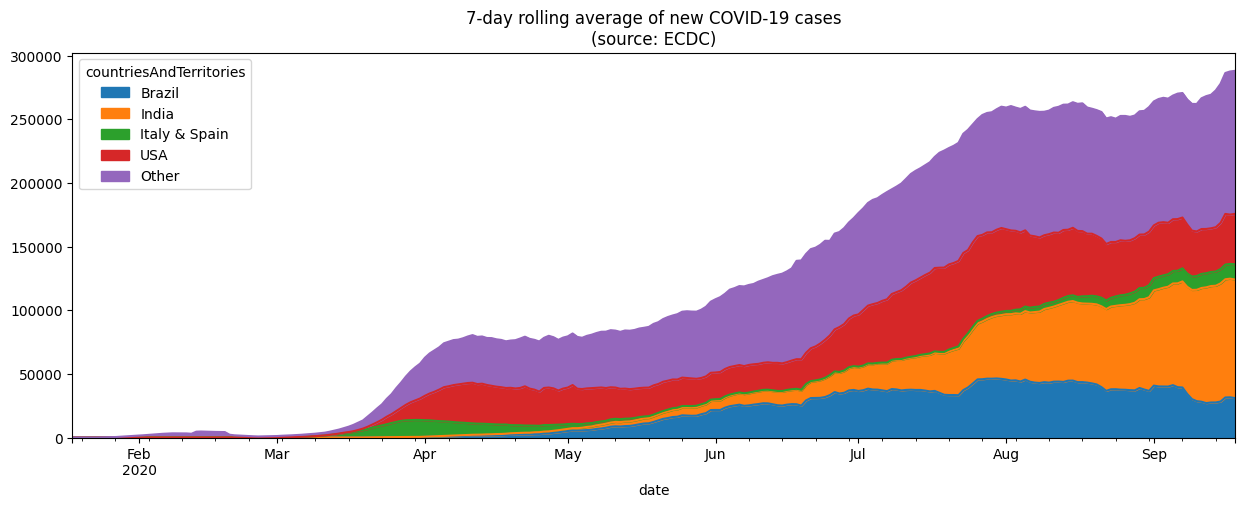

In [19]:
plot_cols = ['Brazil', 'India', 'Italy & Spain', 'USA', 'Other']
grouped = ['Italy', 'Spain']
other_cols = [
    col for col in new_cases_rolling_average.columns
    if col not in plot_cols
]

new_cases_rolling_average.sort_index(axis=1).assign(
    **{
        'Italy & Spain': lambda x: x[grouped].sum(axis=1),
        'Other': lambda x: x[other_cols].drop(columns=grouped).sum(axis=1)
    }
)[plot_cols].plot(
    kind='area', figsize=(15, 5),
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)

Vaqt o'tishi bilan o'zgarishni vizual tarzda ko'rishning yana bir usuli — bu vaqt o'tishi bilan yig'indini ko'rib chiqishdir. Keling, Xitoy, Ispaniya, Italiya, AQSh, Braziliya va Hindistondagi COVID-19 kasalliklarining  kumulyativ sonini chizamiz, avvalgi misolda qilganimizdek, `ax` yordamida subplotlar yaratamiz.


## O'zgaruvchilar o'rtasidagi munosabatlarni vizual tarzda ko'rsatish
### Skatter grafiklari
Biz skatter grafiklarini ikki o'zgaruvchi o'rtasidagi munosabatni vizual tarzda ko'rsatish uchun yaratamiz. Skatter grafiklarini yaratish uchun biz `kind='scatter'` ni va x-o'q uchun bir ustun, y-o'q uchun esa boshqa bir ustunni uzatishimiz kerak:


<Axes: title={'center': 'Facebook Daily High - Low vs. Volume Traded'}, xlabel='volume', ylabel='max_abs_change'>

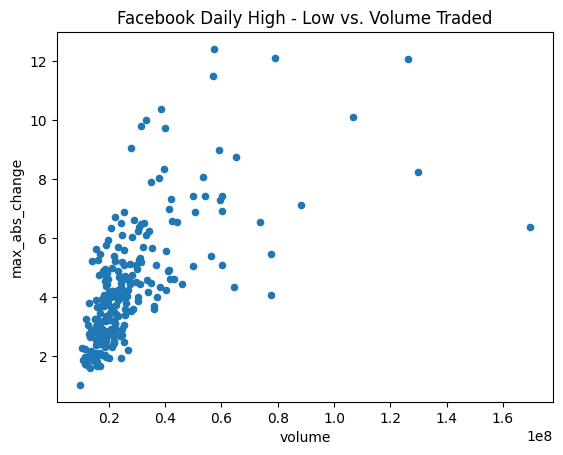

In [20]:
fb.assign(
    max_abs_change=fb.high - fb.low
).plot(
    kind='scatter', x='volume', y='max_abs_change',
    title='Facebook Daily High - Low vs. Volume Traded'
)

Munosabatlar chiziqli ko'rinmayapti, ammo biz x-o'qni logarifmik o'zgartirishni sinab ko'rishimiz mumkin, chunki o'qlarning o'lchamlari juda farq qiladi. `pandas` yordamida biz faqat `logx=True` ni uzatishimiz kerak:


<Axes: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='volume', ylabel='max_abs_change'>

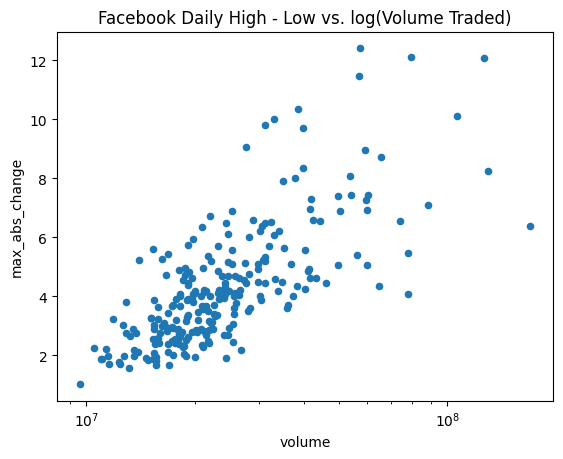

In [21]:
fb.assign(
    max_abs_change=fb.high - fb.low
).plot(
    kind='scatter', x='volume', y='max_abs_change',
    title='Facebook Daily High - Low vs. log(Volume Traded)',
    logx=True
)

`matplotlib` yordamida biz `plt.xscale('log')` ni ishlatib xuddi shu ishni amalga oshirishimiz mumkin.

### Grafiklarga Shaffoflik qo'shish `alpha` yordamida
Ba'zan bizning grafiklarimizda ko'plab ustma-ust qiymatlar bo'ladi, lekin bu ko'rish qiyin bo'lishi mumkin. Buni hal qilish uchun biz `alpha` parametrini ishlatib, vizualizatsiya qilayotgan narsamizning shaffofligini oshirishimiz mumkin. Bu [0, 1] oralig'ida bo'lgan son bo'lib, 0 butunlay shaffof va 1 butunlay o'zgarmasdir. Standart qiymat bu 1 bo'ladi, shuning uchun biz pastroq qiymatni qo'yib, skatter grafikni yana chizamiz:


<Axes: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='volume', ylabel='max_abs_change'>

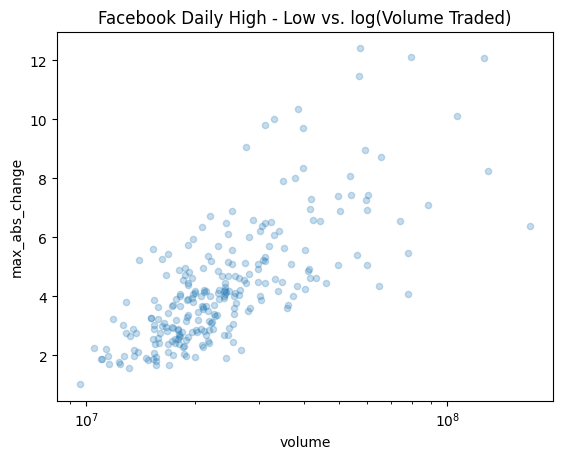

In [28]:
fb.assign(
    max_abs_change=fb.high - fb.low
).plot(
    kind='scatter', x='volume', y='max_abs_change',
    title='Facebook Daily High - Low vs. log(Volume Traded)',
    logx=True, alpha=0.25,
)

### Hexbinlar
Oldingi misolda biz ustma-ust kelishlarni ko'ra boshladik, ammo bu hali ham qiyin. Hexbinlar - bu boshqa turdagi grafiklar bo'lib, ular grafikni olti burchaklarga ajratadi, va bu burchaklar nuqtalar zichligiga qarab soyali bo'ladi. `pandas`da bu `kind` argumenti uchun `hexbin` qiymatidir. Shuningdek, y-o'q bo'ylab necha hexgon bo'lishini belgilovchi `gridsize`ni sozlash kerak bo'lishi mumkin:


<Axes: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='log_volume', ylabel='max_abs_change'>

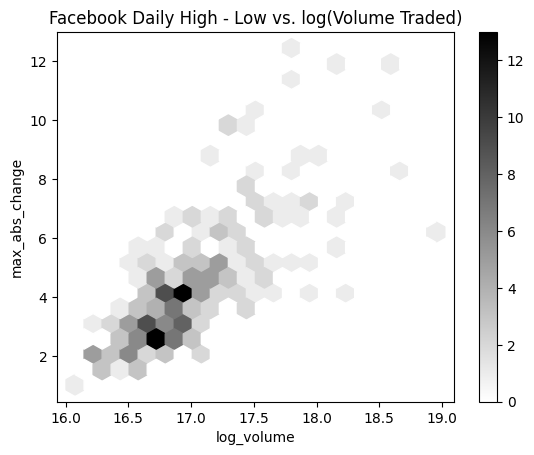

In [29]:
fb.assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).plot(
    kind='hexbin',
    x='log_volume',
    y='max_abs_change',
    title='Facebook Daily High - Low vs. log(Volume Traded)',
    colormap='gray_r',
    gridsize=20,
    sharex=False # we have to pass this to see the x-axis
)

### Korelatsiyalarni Heatmap bilan Vizualizatsiya qilish
Pandas heatmap'larni taqdim etmaydi; ammo agar biz ma'lumotlarimizni matritsaga aylantira olsak, `matplotlib`dan `matshow()` funksiyasini ishlatishimiz mumkin:


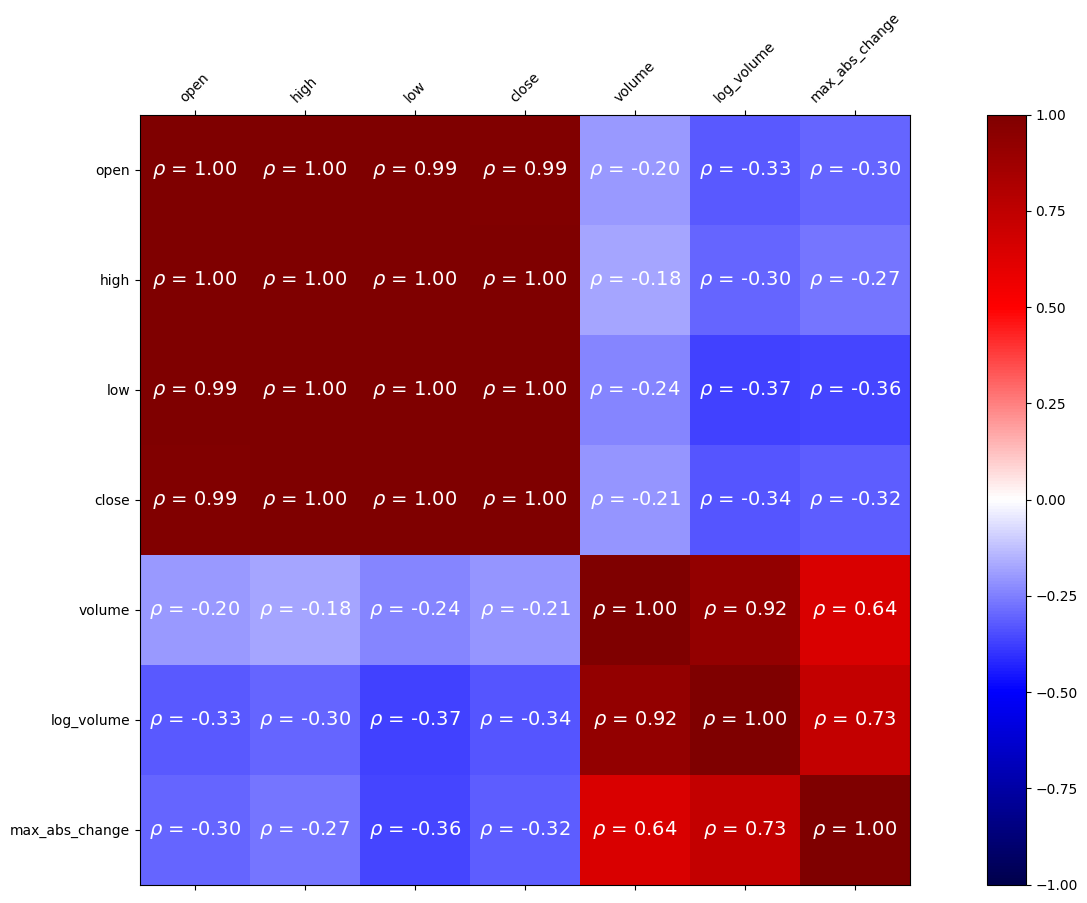

In [30]:
fig, ax = plt.subplots(figsize=(20, 10))

# calculate the correlation matrix
fb_corr = fb.assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).corr()

# create the heatmap and colorbar
im = ax.matshow(fb_corr, cmap='seismic')
im.set_clim(-1, 1)
fig.colorbar(im)

# label the ticks with the column names
labels = [col.lower() for col in fb_corr.columns]
ax.set_xticks(ax.get_xticks()[1:-1]) # to handle bug in matplotlib
ax.set_xticklabels(labels, rotation=45)
ax.set_yticks(ax.get_yticks()[1:-1]) # to handle bug in matplotlib
ax.set_yticklabels(labels)

# include the value of the correlation coefficient in the boxes
for (i, j), coef in np.ndenumerate(fb_corr):
    ax.text(
        i, j, fr'$\rho$ = {coef:.2f}', # raw (r), format (f) string
        ha='center', va='center',
        color='white', fontsize=14
    )

<Axes: >

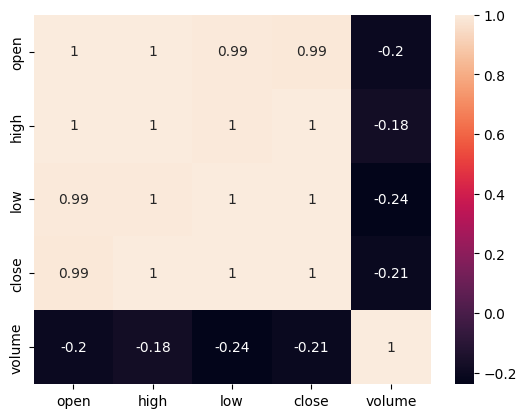

In [35]:
import seaborn as sns

sns.heatmap(fb.corr(), annot=True)

Korelatsiya matritsasidagi qiymatlarga `loc[]` yordamida murojaat qilish mumkin:


In [ ]:
fb_corr.loc['max_abs_change', ['volume', 'log_volume']]

volume        0.642027
log_volume    0.731542
Name: max_abs_change, dtype: float64

## Taqsimotlarni Vizualizatsiya qilish
### Histogrammalar
`pandas` yordamida histogrammalar yaratish juda oson, faqat `plot()` metodiga `kind='hist'`ni berish kerak:


Text(0.5, 0, 'Volume traded')

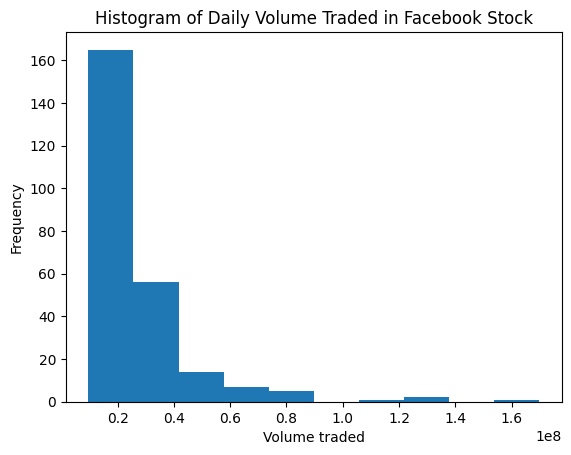

In [34]:
fb.volume.plot(
    kind='hist',
    title='Histogram of Daily Volume Traded in Facebook Stock'
)
plt.xlabel('Volume traded') # label the x-axis (discussed in chapter 6)

Biz histogrammalarni taqsimotlarni taqqoslash uchun `alpha` parametridan foydalangan holda bir-biriga ustma-ust qo'yishimiz mumkin. Masalan, keling, ma'lumotlardagi turli o'lchov usullarining ishlatilishini va kattaligini (magType ustuni) taqqoslaylik:


Text(0.5, 0, 'magnitude')

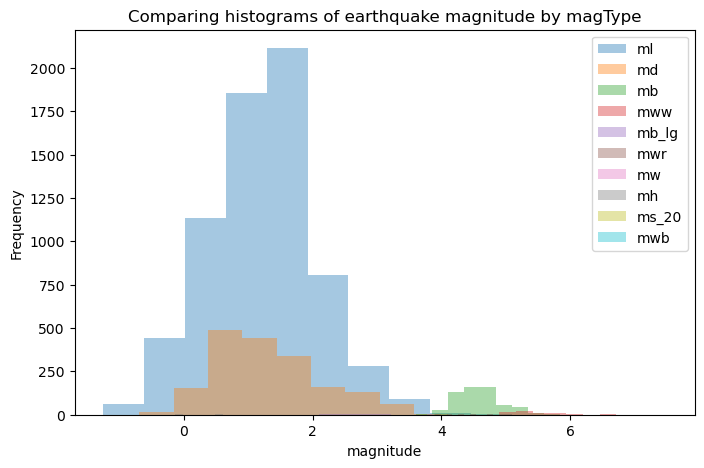

In [ ]:
fig, axes = plt.subplots(figsize=(8, 5))

for magtype in quakes.magType.unique():
    data = quakes.query(f'magType == "{magtype}"').mag
    if not data.empty:
        data.plot(
            kind='hist', ax=axes, alpha=0.4,
            label=magtype, legend=True,
            title='Comparing histograms of earthquake magnitude by magType'
        )

plt.xlabel('magnitude') # label the x-axis (discussed in chapter 6)

### Kernel zichlik baholash (KDE)
Biz `kind='kde'`ni berish orqali ehtimollik zichlik funksiyasining (PDF) bahosini olishimiz mumkin, bu esa bizga ma'lum bir qiymatni olish ehtimolini bildiradi:


Text(0.5, 0, 'Price ($)')

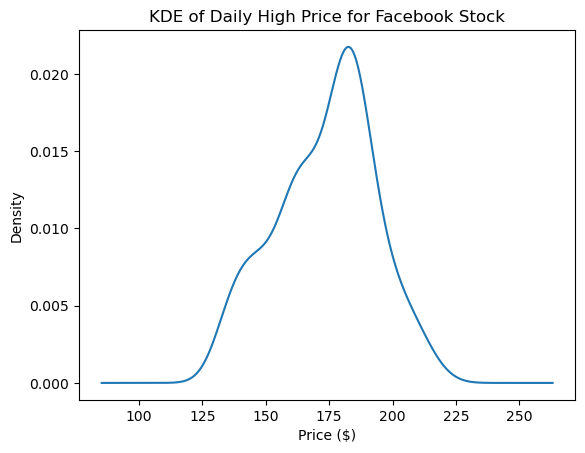

In [ ]:
fb.high.plot(
    kind='kde',
    title='KDE of Daily High Price for Facebook Stock'
)
plt.xlabel('Price ($)') # label the x-axis (discussed in chapter 6)

### `plot()` natijasiga qo'shish
`plot()` usuli `Axes` ob'ektini qaytaradi. Biz bu ob'ekni plotni qo'shimcha sozlash uchun saqlashimiz yoki uni boshqa `plot()` chaqiruviga `ax` argumenti sifatida uzatib, asl plotga qo'shishimiz mumkin.

KDE-ni histogramma ustiga qo'shishni ko'rish ko'pincha foydali bo'lishi mumkin, bu esa ushbu strategiya bilan amalga oshiriladi:


Text(0.5, 0, 'Price ($)')

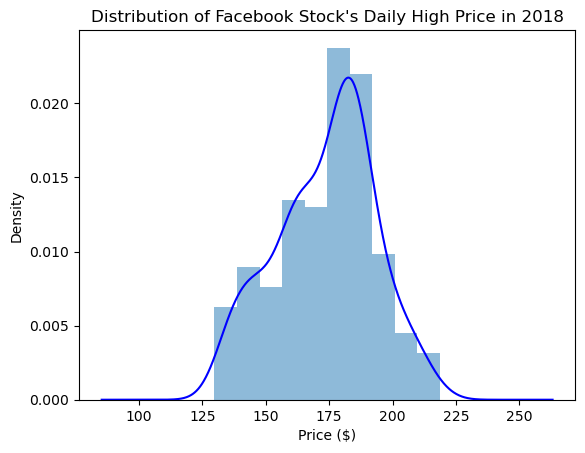

In [ ]:
ax = fb.high.plot(kind='hist', density=True, alpha=0.5)
fb.high.plot(
    ax=ax, kind='kde', color='blue',
    title='Distribution of Facebook Stock\'s Daily High Price in 2018'
)
plt.xlabel('Price ($)') # label the x-axis (discussed in chapter 6)

### ECDF ni chizish
Ba'zi holatlarda, bizni ko'proq o'sha qiymatga teng yoki undan kichikroq (yoki katta yoki teng) bo'lish ehtimoli qiziqtiradi, bu esa **kümülatif taqsimot funksiyasi (CDF)** bilan ko'rsatiladi. `statsmodels` paketidan foydalangan holda, biz **empirik kümülatif taqsimot funksiyasini (ECDF)** baholaymiz:


Text(0.5, 1.0, 'ECDF of earthquake magnitude with magType ml')

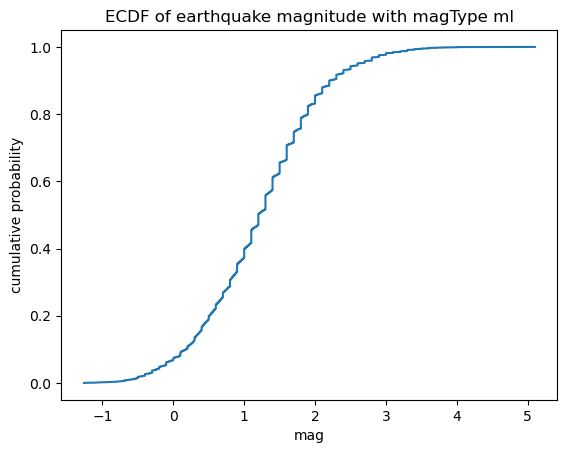

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)

# axis labels (we will cover this in chapter 6)
plt.xlabel('mag') # add x-axis label
plt.ylabel('cumulative probability') # add y-axis label

# add title (we will cover this in chapter 6)
plt.title('ECDF of earthquake magnitude with magType ml')

This ECDF tells us the probability of getting an earthquake with magnitude of 3 or less using the `ml` scale is 98%:

Text(0.5, 1.0, 'P(mag <= 3) = 98%')

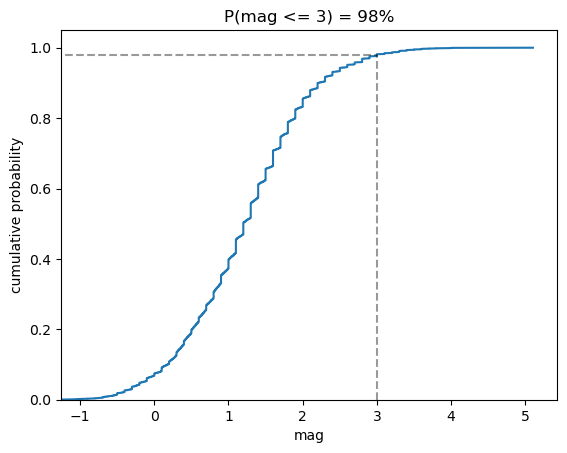

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)

# formatting below will all be covered in chapter 6
# axis labels
plt.xlabel('mag') # add x-axis label
plt.ylabel('cumulative probability') # add y-axis label

# add reference lines for interpreting the ECDF for mag <= 3
plt.plot(
    [3, 3], [0, .98], '--k',
    [-1.5, 3], [0.98, 0.98], '--k', alpha=0.4
)

# set axis ranges
plt.ylim(0, None)
plt.xlim(-1.25, None)

# add a title
plt.title('P(mag <= 3) = 98%')

### Box plots
Box plotlarini `pandas` bilan yasash uchun `plot()` metodiga `kind='box'` parametrini beramiz:


Text(0, 0.5, 'price ($)')

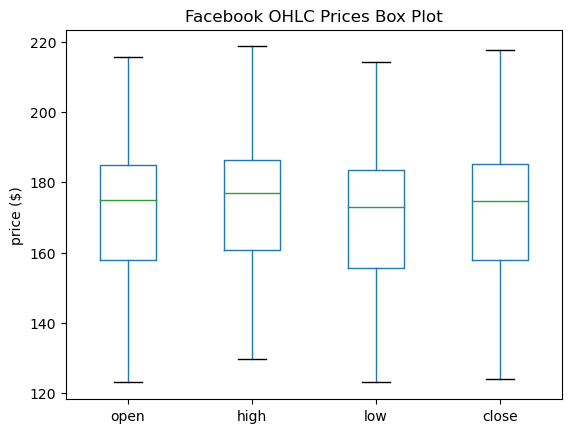

In [ ]:
fb.iloc[:,:4].plot(kind='box', title='Facebook OHLC Prices Box Plot')
plt.ylabel('price ($)') # label the y-axis (discussed in chapter 6)

Agar `notch=True` deb bersak, bizga notli box plot olinadi. Notch median atrofidagi 95% ishonch oralig'ini ko'rsatadi, bu esa farqlarni taqqoslashda foydali bo'lishi mumkin. Notchli box plotni talqin qilish bo'yicha kirish uchun ushbu [Google sayt sahifasini](https://sites.google.com/site/davidsstatistics/home/notched-box-plots) va ushbu [Towards Data Science maqolasini](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51) ko'ring.


Text(0, 0.5, 'price ($)')

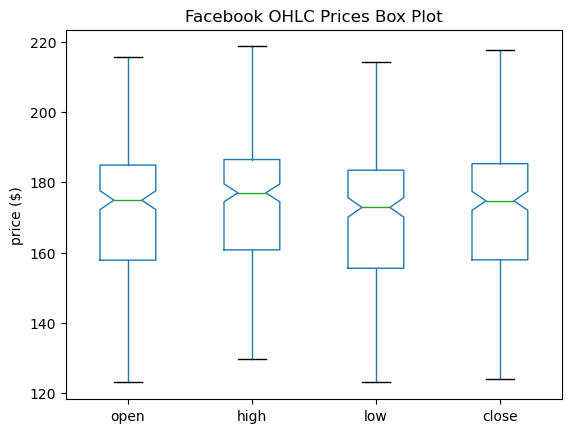

In [ ]:
fb.iloc[:,:4].plot(kind='box', title='Facebook OHLC Prices Box Plot', notch=True)
plt.ylabel('price ($)') # label the y-axis (discussed in chapter 6)

We can use this to see the distribution of magnitudes across the different measurement methods for earthquakes:

Text(0, 0.5, 'magnitude')

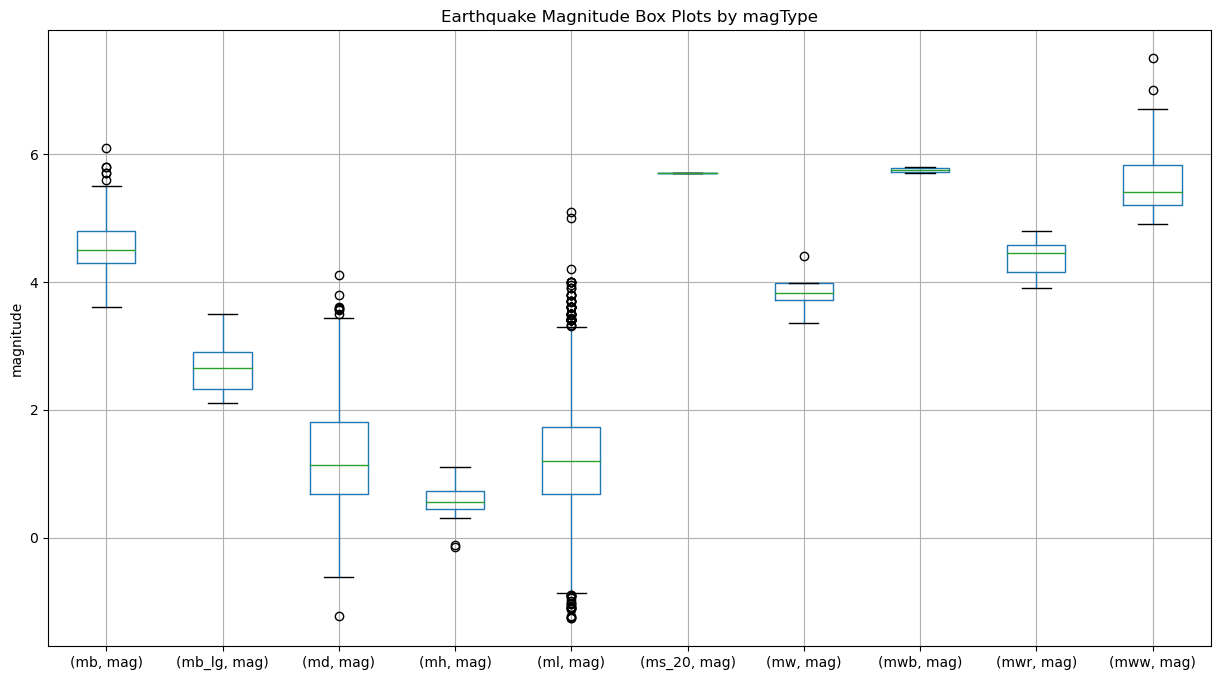

In [ ]:
quakes[['mag', 'magType']].groupby('magType').boxplot(
    figsize=(15, 8), subplots=False
)
plt.title('Earthquake Magnitude Box Plots by magType')
plt.ylabel('magnitude') # label the y-axis (discussed in chapter 6)

## Hisoblar va chastotalar
### barplot diagrammasi
`kind='barh'` parametrini berish bilan bizga gorizontal stollar, `kind='bar'` esa vertikal stollarni beradi. Keling, ma'lumotlarimizdagi yer silkinishlari uchun eng yuqori 15 ta joyni ko'rish uchun gorizontal stollarni ishlataylik:


Text(0.5, 0, 'earthquakes')

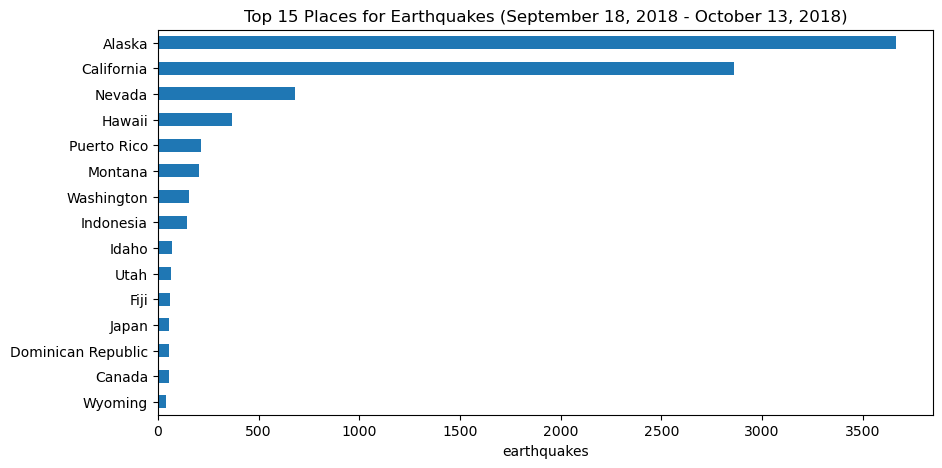

In [ ]:
quakes.parsed_place.value_counts().iloc[14::-1,].plot(
    kind='barh', figsize=(10, 5),
    title='Top 15 Places for Earthquakes '
          '(September 18, 2018 - October 13, 2018)'
)
plt.xlabel('earthquakes') # label the x-axis (discussed in chapter 6)

We also have data on whether earthquakes were accompanied by tsunamis. Let's see what the top places for tsunamis are:

Text(0.5, 0, 'tsunamis')

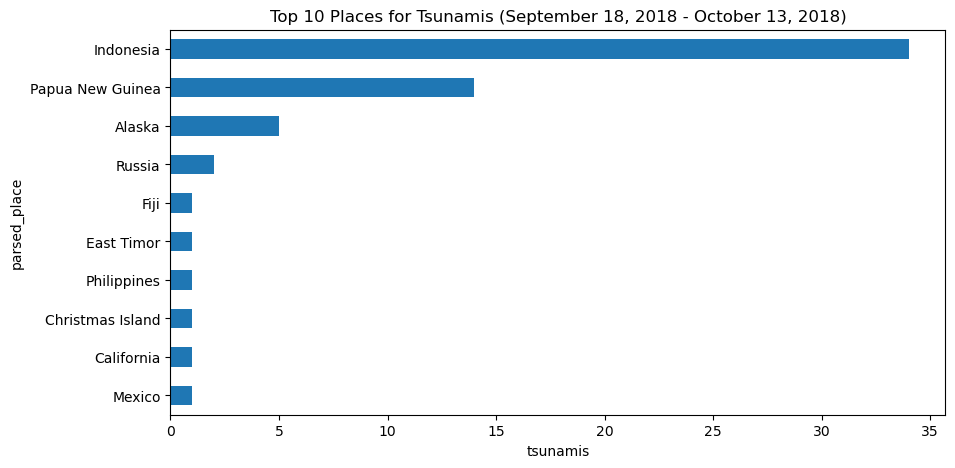

In [ ]:
quakes.groupby('parsed_place').tsunami.sum().sort_values().iloc[-10:,].plot(
    kind='barh', figsize=(10, 5),
    title='Top 10 Places for Tsunamis '
          '(September 18, 2018 - October 13, 2018)'
)
plt.xlabel('tsunamis') # label the x-axis (discussed in chapter 6)

Seeing that Indonesia is the top place for tsunamis during the time period we are looking at, we may want to look how many earthquakes and tsunamis Indonesia gets on a daily basis. We could show this as a line plot or with bars; since we don't want to interpolate, we will use bars here:

Text(0, 0.5, 'count')

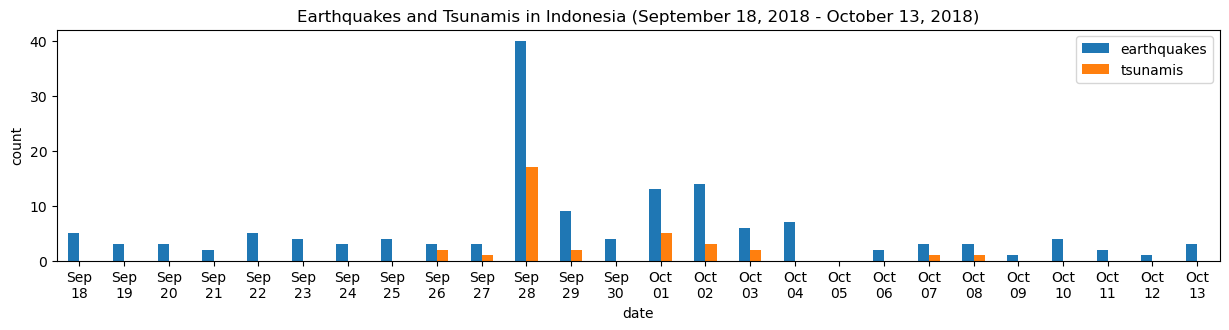

In [ ]:
indonesia_quakes = quakes.query('parsed_place == "Indonesia"').assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms'),
    earthquake=1
).set_index('time').resample('1D').sum()

# format the datetimes in the index for the x-axis
indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')

indonesia_quakes.plot(
    y=['earthquake', 'tsunami'], kind='bar', figsize=(15, 3),
    rot=0, label=['earthquakes', 'tsunamis'],
    title='Earthquakes and Tsunamis in Indonesia '
          '(September 18, 2018 - October 13, 2018)'
)

# label the axes (discussed in chapter 6)
plt.xlabel('date')
plt.ylabel('count')

Using the `kind` arugment for vertical bars when the labels for each bar are shorter:

Text(0, 0.5, 'earthquakes')

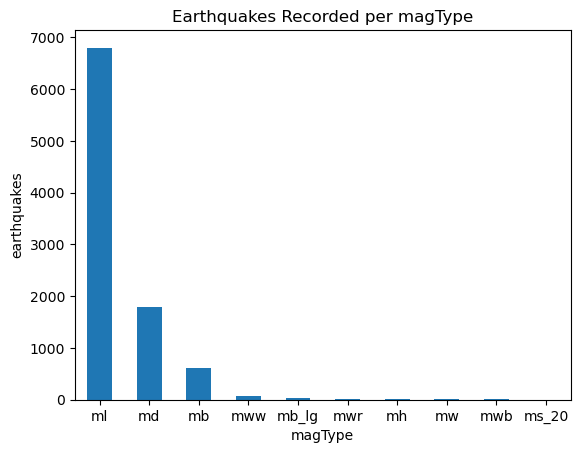

In [ ]:
quakes.magType.value_counts().plot(
    kind='bar', title='Earthquakes Recorded per magType', rot=0
)

# label the axes (discussed in chapter 6)
plt.xlabel('magType')
plt.ylabel('earthquakes')

### Stacked bars

<AxesSubplot:title={'center':'Earthquakes by integer magnitude and magType'}, xlabel='mag_bin', ylabel='earthquakes'>

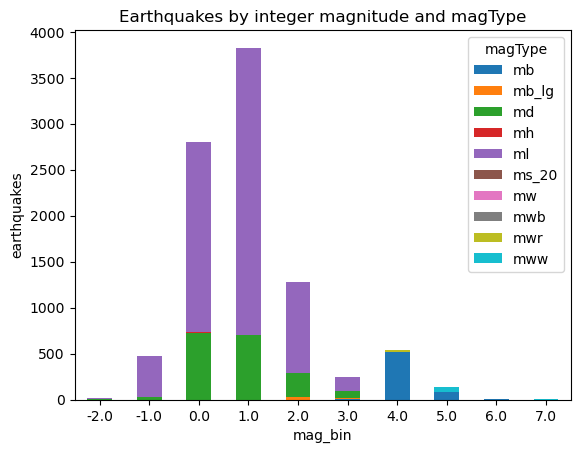

In [ ]:
pivot = quakes.assign(
    mag_bin=lambda x: np.floor(x.mag)
).pivot_table(
    index='mag_bin', columns='magType', values='mag', aggfunc='count'
)
pivot.plot.bar(
    stacked=True, rot=0, ylabel='earthquakes',
    title='Earthquakes by integer magnitude and magType'
)

#### Normalized stacked bars
Plot the percentages to be better able to see the different `magTypes`.

Text(0, 0.5, 'percentage')

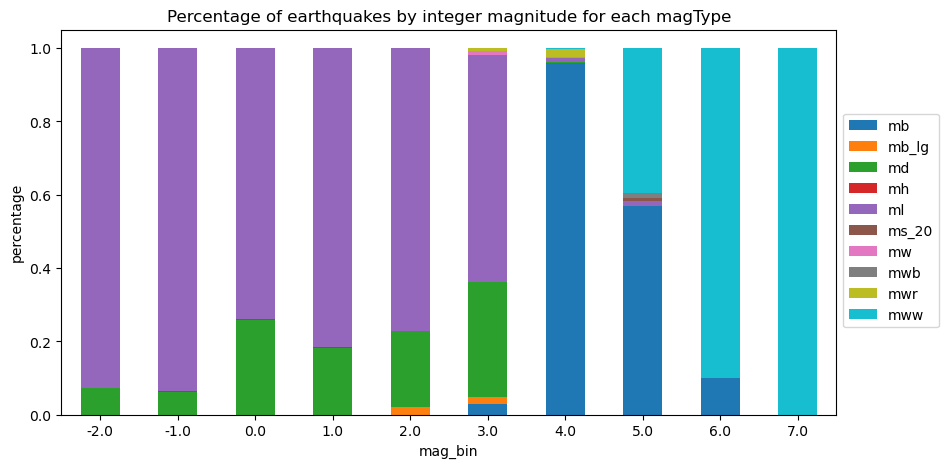

In [ ]:
normalized_pivot = pivot.fillna(0).apply(lambda x: x / x.sum(), axis=1)
ax = normalized_pivot.plot.bar(
    stacked=True, rot=0, figsize=(10, 5),
    title='Percentage of earthquakes by integer magnitude for each magType'
)
ax.legend(bbox_to_anchor=(1, 0.8)) # move legend to the right of the plot
plt.ylabel('percentage') # label the y-axis (discussed in chapter 6)

We can also create horizontal stacked bars and do so using `groupby()` and `unstack()`:

Text(0, 0.5, '')

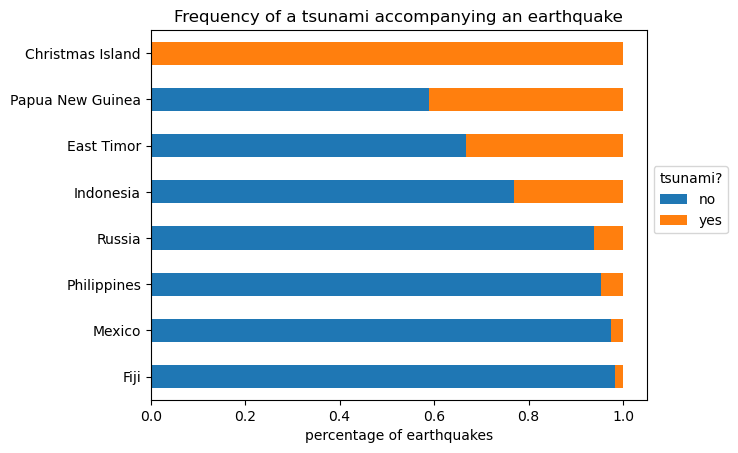

In [ ]:
quakes.groupby(['parsed_place', 'tsunami']).mag.count()\
    .unstack().apply(lambda x: x / x.sum(), axis=1)\
    .rename(columns={0: 'no', 1: 'yes'})\
    .sort_values('yes', ascending=False)[7::-1]\
    .plot.barh(
        title='Frequency of a tsunami accompanying an earthquake',
        stacked=True
    )

# move legend to the right of the plot
plt.legend(title='tsunami?', bbox_to_anchor=(1, 0.65))

# label the axes (discussed in chapter 6)
plt.xlabel('percentage of earthquakes')
plt.ylabel('')

<hr>
<div>
    <a href="./1-introducing_matplotlib.ipynb">
        <button>&#8592; Previous Notebook</button>
    </a>
    <a href="./3-pandas_plotting_module.ipynb">
        <button style="float: right;">Next Notebook &#8594;</button>
    </a>
</div>
<hr>